Cargar la base de datos a drive

Conectar colab con drive

Descomprimir el archivo con la funcion !unzip + dirección del archivo



In [ ]:
#!pip install unrar

In [ ]:
!unrar x /content/drive/MyDrive/Dataset/simpsons.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Dataset/simpsons.rar

Creating    simpsons_filtro                                           OK
Creating    simpsons_filtro/abraham_grampa_simpson                    OK
Extracting  simpsons_filtro/abraham_grampa_simpson/abraham_grampa_simpson_ gray_0.jpg       0%  OK 
Extracting  simpsons_filtro/abraham_grampa_simpson/abraham_grampa_simpson_ gray_1.jpg       0%  OK 
Extracting  simpsons_filtro/abraham_grampa_simpson/abraham_grampa_simpson_ gray_10.jpg       0%  OK 
Extracting  simpsons_filtro/abraham_grampa_simpson/abraham_grampa_simpson_ gray_100.jpg       0%  OK 
Extracting  simpsons_filtro/abraham_grampa_simpson/abraham_grampa_simpson_ gray_101.jpg       0%  OK 
Extracting  simpsons_filtro/abraham_grampa_simpson/abraham_grampa_simpson_ gray_102.jpg       0%  OK 
Extracting  simpsons_filtro/abraham_grampa_simpson/abraham_gram

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import glob
import os
import cv2 as cv

from sklearn.preprocessing import LabelEncoder         # sklearn labelEncoder codifica las etiquetas de destino con un valor entre 0 y n_classes-1.
from sklearn.preprocessing import OneHotEncoder  

from google.colab.patches import cv2_imshow

import pickle

In [ ]:
categorias = [os.path.basename(x) for x in glob.glob('/content/simpsons_filtro/*')] #extraer nombre de las carpetas
print(len(categorias))       # Número de categorias
name = sorted(categorias)    # Ordenar las categorias por orden alfabetico
name                         # Tiene el mismo orden que el dataset original

49


['abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson',
 'brandine_spuckler',
 'carl_carlson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'cletus_spuckler',
 'comic_book_guy',
 'disco_stu',
 'dolph_starbeam',
 'duff_man',
 'edna_krabappel',
 'fat_tony',
 'gary_chalmers',
 'gil',
 'groundskeeper_willie',
 'homer_simpson',
 'jimbo_jones',
 'kearney_zzyzwicz',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lionel_hutz',
 'lisa_simpson',
 'lunchlady_doris',
 'maggie_simpson',
 'marge_simpson',
 'martin_prince',
 'mayor_quimby',
 'milhouse_van_houten',
 'miss_hoover',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'otto_mann',
 'patty_bouvier',
 'principal_skinner',
 'professor_john_frink',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'selma_bouvier',
 'sideshow_bob',
 'sideshow_mel',
 'snake_jailbird',
 'troy_mcclure',
 'waylon_smithers']

In [ ]:
img_train = []
tamaño=[]
for d in range(0,10):
    g = 0
    aux = 0 
    for img in os.listdir('/content/simpsons_filtro/'+ name[d]):
      im = cv.imread(os.path.join('/content/simpsons_filtro/'+name[d],img))
      imga = cv.resize(im,(200,200))
      img_train.append(imga)
      g+=1
      aux+=1
      if aux == 5500:
        break
    tamaño.append(g)

In [ ]:
img_train = np.array(img_train)

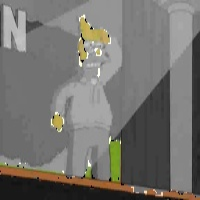

In [ ]:
cv2_imshow(img_train[1231])

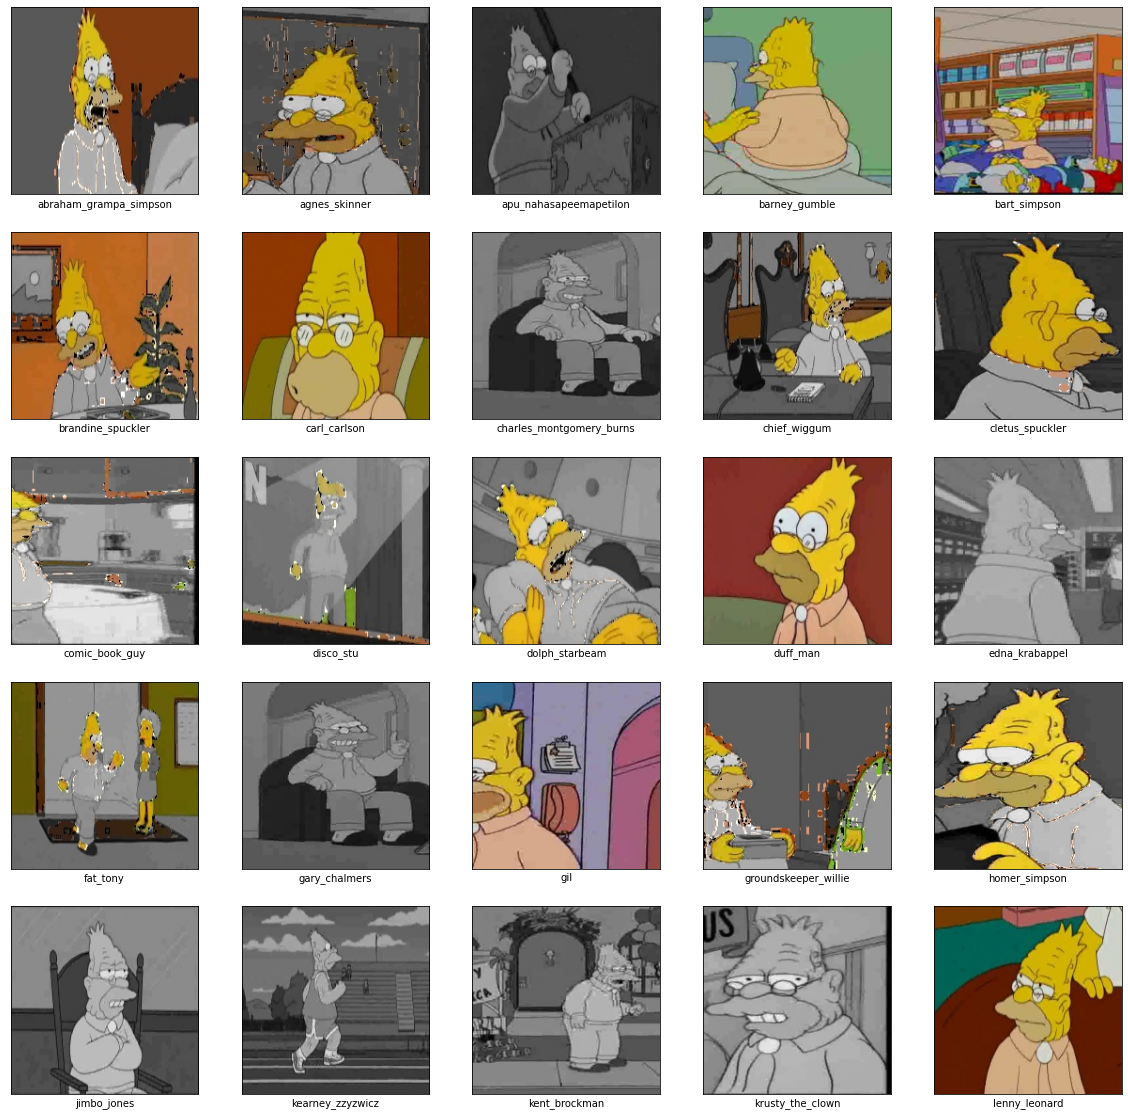

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,25):
  im = img_train[i+1220]
  imagen = cv.cvtColor(im,cv.COLOR_BGR2RGB)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen)
  plt.xlabel(name[i])
plt.show()

In [ ]:
print(tamaño)
print(len(tamaño))

[2880, 2795, 1989, 852, 5500, 5500, 5375, 3720, 3108, 900]
10


In [ ]:
len(img_train)

32619

In [ ]:
e = np.zeros(len(img_train))
inicio = tamaño[0]
for x in range(1,len(tamaño)):
  fin = inicio + tamaño[x]
  for y in range(inicio,fin):
    e[y] = x
  inicio = y

In [ ]:
e.shape

(32619,)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
y_train = e.reshape(len(e), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

In [ ]:
y_train_onehot.shape

(32619, 10)

In [ ]:
print(y_train_onehot[1231])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#Modelo

In [ ]:
CNN = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(15,(3,3),activation='leaky_relu',input_shape=(200,200,3),padding='SAME'),
#    tf.keras.layers.Conv2D(32,(3,3),activation='leaky_relu',padding='SAME'),
    tf.keras.layers.MaxPool2D(2,2),# 100x100
    tf.keras.layers.Conv2D(30,(3,3),activation='leaky_relu',padding='SAME'),
#    tf.keras.layers.Conv2D(128,(3,3),activation='leaky_relu',padding='SAME'),
    tf.keras.layers.MaxPool2D(2,2),# 100x100
#    tf.keras.layers.Conv2D(112,(5,5),activation='relu',padding='SAME'),
#    tf.keras.layers.Conv2D(224,(5,5),activation='leaky_relu',padding='SAME'),
#    tf.keras.layers.MaxPool2D(2,2),# 50x50
#    tf.keras.layers.Conv2D(448,(7,7),activation='relu',padding='SAME'),
    tf.keras.layers.Conv2D(60,(3,3),activation='leaky_relu',padding='SAME'),
    tf.keras.layers.MaxPool2D(2,2),# 25x25

    tf.keras.layers.Flatten(), 
#    tf.keras.Input(shape=(1000,)),
    tf.keras.layers.Dense(80,activation ='leaky_relu'),
    tf.keras.layers.Dense(80,activation ='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(50,activation ='leaky_relu'),
    tf.keras.layers.Dense(50,activation ='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(100,activation ='relu'),#50
    tf.keras.layers.Dense(len(tamaño),activation = 'softmax')
    ])

#Metricas

In [ ]:
CNN.compile(optimizer=tf.keras.optimizers.Adam(0.0001),          # optimizador Adam con learning rate 0.001
            loss=tf.keras.losses.categorical_crossentropy,      # calcular la perdida por entropia cruzada
            metrics=['accuracy'])  

#Entrenamiento

In [ ]:
historial = CNN.fit(img_train,y_train_onehot,batch_size=400,epochs=40,shuffle=True,validation_split=0.10)

Epoch 1/40
74/74 [==============================] - 32s 302ms/step - loss: 2.6180 - accuracy: 0.3891 - val_loss: 2.7513 - val_accuracy: 0.0083
Epoch 2/40
74/74 [==============================] - 21s 285ms/step - loss: 1.1681 - accuracy: 0.6108 - val_loss: 2.8184 - val_accuracy: 0.0077
Epoch 3/40
74/74 [==============================] - 22s 295ms/step - loss: 0.9555 - accuracy: 0.6838 - val_loss: 2.8796 - val_accuracy: 0.0205
Epoch 4/40
74/74 [==============================] - 21s 287ms/step - loss: 0.7962 - accuracy: 0.7377 - val_loss: 2.5739 - val_accuracy: 0.1199
Epoch 5/40
74/74 [==============================] - 21s 285ms/step - loss: 0.6772 - accuracy: 0.7781 - val_loss: 2.7045 - val_accuracy: 0.1235
Epoch 6/40
74/74 [==============================] - 21s 287ms/step - loss: 0.5790 - accuracy: 0.8106 - val_loss: 2.6290 - val_accuracy: 0.2106
Epoch 7/40
74/74 [==============================] - 21s 288ms/step - loss: 0.4975 - accuracy: 0.8364 - val_loss: 2.6769 - val_accuracy: 0.3280

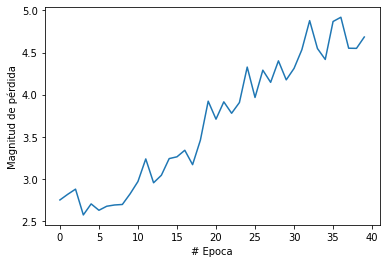

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["val_loss"])
plt.show()

In [ ]:
k = []
m = cv.imread('/content/agnes.jpg')
imagen = cv.resize(m,(200,200))
k.append(imagen)

error: ignored

In [ ]:
cv2_imshow(m)

In [ ]:
m = np.array(k)
m.shape

In [ ]:
solve = max(CNN.predict(m))
print(solve)

In [ ]:
s = tf.math.argmax(solve)
print(s)
print(name[s])